In [1]:
from konlpy.tag import Mecab
mecab = Mecab()
print(mecab.pos("복잡하지만 Mecab 설치 오류 해결!!"))

[('복잡', 'XR'), ('하', 'XSA'), ('지만', 'EC'), ('Mecab', 'SL'), ('설치', 'NNG'), ('오류', 'NNG'), ('해결', 'NNG'), ('!', 'SF'), ('!', 'SF')]


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [11]:
data = pd.read_csv("https://raw.githubusercontent.com/haram4th/ablearn/main/hotel_review_75000.csv")

In [4]:
data.head()

,Unnamed: 0.1,Unnamed: 0,hotelId,hotelName,tripType,tripTypeText,reviewDate,rating,description,isKorNot
0,0,356,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),family,1박 가족 여행,2019년 1월 26일,10.0,직원들 서비스나 마인드 완벽합니다 다만 노후된 시설과 좁은 라운지가 호텔 이름에 비...,True
1,1,357,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),family,1박 가족 여행,2019년 2월 4일,10.0,웨스틴조선은 모든면에서 최고의 숙소라고 생각합니다 분위기 편의성 직원친절도까지 모두...,True
2,2,358,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),other,2박 여행,2019년 2월 2일,10.0,서울시내에서 호캉스를 누릴 수 있는 곳아침 뷔페가 맛있는 곳룸서비스가 좋았음요구사항...,True
3,3,359,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),romance,1박 로맨틱 여행,2019년 1월 26일,10.0,가격에 맞게 만족했습니다,True
4,4,360,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),with-friends,친구와 1박 여행,2019년 1월 25일,10.0,처음 세명으로 셋팅 되어있지 않은점 빼고는 직원들의 친절도 및 서비스는 모두 맘에 ...,True


In [140]:
data['hotelName'].unique()

array(['서울 웨스틴조선호텔 (The Westin Chosun Seoul)',
       '그랜드 하얏트 서울 (Grand Hyatt Seoul)',
       '밀레니엄 힐튼 서울 (Millennium Hilton Seoul)', ...,
       '더 스테이 호스텔 (The Stay Hostel)', '이즈미르 펜션 (Izmir Pension)',
       '씨 크루즈 호텔 (Sea Cruise Hotel)'], dtype=object)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  75000 non-null  int64  
 1   Unnamed: 0    75000 non-null  int64  
 2   hotelId       75000 non-null  int64  
 3   hotelName     75000 non-null  object 
 4   tripType      75000 non-null  object 
 5   tripTypeText  75000 non-null  object 
 6   reviewDate    75000 non-null  object 
 7   rating        75000 non-null  float64
 8   description   75000 non-null  object 
 9   isKorNot      75000 non-null  bool   
dtypes: bool(1), float64(1), int64(3), object(5)
memory usage: 5.2+ MB


In [8]:
#data.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1) # 할당은 안돼 있어.

,hotelId,hotelName,tripType,tripTypeText,reviewDate,rating,description,isKorNot
0,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),family,1박 가족 여행,2019년 1월 26일,10.0,직원들 서비스나 마인드 완벽합니다 다만 노후된 시설과 좁은 라운지가 호텔 이름에 비...,True
1,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),family,1박 가족 여행,2019년 2월 4일,10.0,웨스틴조선은 모든면에서 최고의 숙소라고 생각합니다 분위기 편의성 직원친절도까지 모두...,True
2,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),other,2박 여행,2019년 2월 2일,10.0,서울시내에서 호캉스를 누릴 수 있는 곳아침 뷔페가 맛있는 곳룸서비스가 좋았음요구사항...,True
3,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),romance,1박 로맨틱 여행,2019년 1월 26일,10.0,가격에 맞게 만족했습니다,True
4,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),with-friends,친구와 1박 여행,2019년 1월 25일,10.0,처음 세명으로 셋팅 되어있지 않은점 빼고는 직원들의 친절도 및 서비스는 모두 맘에 ...,True
...,...,...,...,...,...,...,...,...
74995,798937728,씨 크루즈 호텔 (Sea Cruise Hotel),romance,1박 로맨틱 여행,2019년 8월 17일,10.0,조식과 스탠더드 하프전망 신청해서 1박 했는데요ᆢ너무 좋아요ᆢ다만 가격이 좀 나가...,True
74996,798937728,씨 크루즈 호텔 (Sea Cruise Hotel),romance,2박 로맨틱 여행,2018년 11월 30일,8.0,객실은 깔끔하고 에메니티도 딱 필요한만큼 있었습니다 5분거리에 중앙시장이 있어 쇼핑...,True
74997,798937728,씨 크루즈 호텔 (Sea Cruise Hotel),family,1박 가족 여행,2019년 12월 4일,8.0,배드가 좋고 조용해서 좋았습니다찬바람이 좀 들어와서 난방기를 12시간 정도 돌려야 ...,True
74998,798937728,씨 크루즈 호텔 (Sea Cruise Hotel),other,1박 여행,2019년 5월 2일,8.0,우선 위치가 너무 좋았고 숙소에 짐을 놓고 걸어서 주변 가볼곳도 있고 먹거리도 맛있...,True


In [9]:
#data.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True) # inplace=True 변수에 할당시키기 옵션

In [13]:
del data['Unnamed: 0.1'] # 두번째 지우는 방법 del 이용하기.

In [16]:
data = data.drop(['Unnamed: 0'], axis=1)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   hotelId       75000 non-null  int64  
 1   hotelName     75000 non-null  object 
 2   tripType      75000 non-null  object 
 3   tripTypeText  75000 non-null  object 
 4   reviewDate    75000 non-null  object 
 5   rating        75000 non-null  float64
 6   description   75000 non-null  object 
 7   isKorNot      75000 non-null  bool   
dtypes: bool(1), float64(1), int64(1), object(5)
memory usage: 4.1+ MB


In [19]:
data # Either ratings positive or nagative according to descriptions.

,hotelId,hotelName,tripType,tripTypeText,reviewDate,rating,description,isKorNot
0,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),family,1박 가족 여행,2019년 1월 26일,10.0,직원들 서비스나 마인드 완벽합니다 다만 노후된 시설과 좁은 라운지가 호텔 이름에 비...,True
1,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),family,1박 가족 여행,2019년 2월 4일,10.0,웨스틴조선은 모든면에서 최고의 숙소라고 생각합니다 분위기 편의성 직원친절도까지 모두...,True
2,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),other,2박 여행,2019년 2월 2일,10.0,서울시내에서 호캉스를 누릴 수 있는 곳아침 뷔페가 맛있는 곳룸서비스가 좋았음요구사항...,True
3,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),romance,1박 로맨틱 여행,2019년 1월 26일,10.0,가격에 맞게 만족했습니다,True
4,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),with-friends,친구와 1박 여행,2019년 1월 25일,10.0,처음 세명으로 셋팅 되어있지 않은점 빼고는 직원들의 친절도 및 서비스는 모두 맘에 ...,True
...,...,...,...,...,...,...,...,...
74995,798937728,씨 크루즈 호텔 (Sea Cruise Hotel),romance,1박 로맨틱 여행,2019년 8월 17일,10.0,조식과 스탠더드 하프전망 신청해서 1박 했는데요ᆢ너무 좋아요ᆢ다만 가격이 좀 나가...,True
74996,798937728,씨 크루즈 호텔 (Sea Cruise Hotel),romance,2박 로맨틱 여행,2018년 11월 30일,8.0,객실은 깔끔하고 에메니티도 딱 필요한만큼 있었습니다 5분거리에 중앙시장이 있어 쇼핑...,True
74997,798937728,씨 크루즈 호텔 (Sea Cruise Hotel),family,1박 가족 여행,2019년 12월 4일,8.0,배드가 좋고 조용해서 좋았습니다찬바람이 좀 들어와서 난방기를 12시간 정도 돌려야 ...,True
74998,798937728,씨 크루즈 호텔 (Sea Cruise Hotel),other,1박 여행,2019년 5월 2일,8.0,우선 위치가 너무 좋았고 숙소에 짐을 놓고 걸어서 주변 가볼곳도 있고 먹거리도 맛있...,True


In [20]:
data = data.drop(['hotelId', 'isKorNot', 'tripTypeText'],axis=1)

In [23]:
data['hotelName'].nunique() # There are 2015 hotel names.

2015

In [24]:
data['tripType'].value_counts()

tripType
family          28680
other           16859
business        11487
romance         10731
with-friends     7243
Name: count, dtype: int64

In [25]:
data['rating'].describe()

count    75000.000000
mean         8.167813
std          2.199348
min          2.000000
25%          8.000000
50%          8.000000
75%         10.000000
max         10.000000
Name: rating, dtype: float64

In [29]:
data['rating'].value_counts()

rating
10.0    34103
8.0     24283
6.0      8877
4.0      4278
2.0      3459
Name: count, dtype: int64

<Axes: >

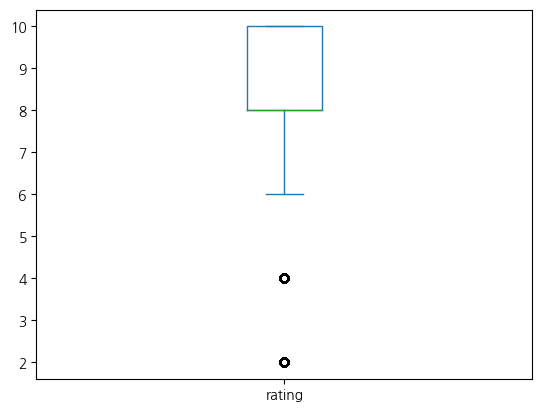

In [28]:
data['rating'].plot(kind='box')

* 대부분 평점이 8-10 사이, 8 미만은 많지 않음.

/tmp/ipykernel_10610/3169801868.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['rating'])
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na',

<Axes: xlabel='rating', ylabel='Density'>

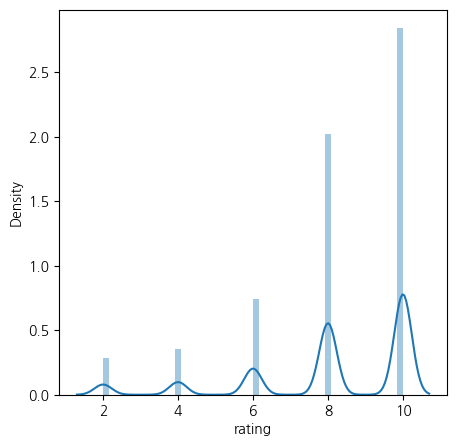

In [42]:
plt.figure(figsize=(5,5))
sns.distplot(data['rating'])

In [46]:
data.loc[data['rating'] <= 6, ['rating', 'description']]

,rating,description
15,4.0,가성비 별로였습니다 기대를 많이 했기에 실망도 컸다고 봅니다 예약하고 사전에 메일을...
30,6.0,4번째 이 호텔을 방문하는 것이었습니다 예전에 너무 좋아하는 호텔이었는데 이번엔 실...
35,6.0,서비스 친절도가 프로답지않은 느낌입니다
41,2.0,보통 이뷰 남기지 않는데 처음으로 남겨봅니다 국내외 특급호텔 많이 다녀봤는데 이 곳...
43,2.0,고객을 편안히개 만드는 법을 잘 아는 호텔입니다 오랜 역사가 과연 명불허전 종업원 ...
...,...,...
74979,4.0,송풍기인지 환풍기인지 소음이 너무커서 시끄러웠다난방도 공조시스템으로 되어있는데 작동...
74982,6.0,별로였습니다그냥 비지니스 호텔 같은 느낌이었습니다
74990,6.0,방이 생각보다 작아서 놀랐음성수기이긴 했지만 2박에 30만원 넘는 숙소를 구했는데조...
74992,6.0,우선수건이 비치가 안되어있음수건이 없다는건 청소상태를 확인 안한듯주차구역이 적음 ...


In [52]:
data.loc[data['rating'] <= 6, ['rating', 'description']].loc[30]['description'] # to show full descriptions

'4번째 이 호텔을 방문하는 것이었습니다 예전에 너무 좋아하는 호텔이었는데 이번엔 실망이 컸습니다주변이 너무 시끄럽습니다 호텔 바로 앞에서 시위하는 사람들이 있는데 아침 640에도 확성기 소리가 나서 깨었습니다 게다가 주말에 시청 근처에서 시위가 많아서 오후엔 낮잠을 잘 수 없을 정도입니다 예약할 때 이러한 소음이 존재한다는 것을 알았으면 절대 가지 않았을 겁니다executive로의 업그레이드에 대한 공지가 예약할 때 제대로 이뤄어지지 않아 막상 체크인 당일에 하려고 하니 인원이 찼다고 거절당했습니다 식구들이 이 호텔 사우나를 좋아해서 예약했는데 사우나 사용시 추가 요금이 부담스러운 가격입니다 시청 앞 시위 그리고 호텔 앞에서 매일 일어나는 시위가 잠잠해질 때까지 예약하는 것을 신중하게 고려하세요'

In [49]:
data[data['rating'] <= 6][['rating', 'description']] #another way to see some of variables

,rating,description
15,4.0,가성비 별로였습니다 기대를 많이 했기에 실망도 컸다고 봅니다 예약하고 사전에 메일을...
30,6.0,4번째 이 호텔을 방문하는 것이었습니다 예전에 너무 좋아하는 호텔이었는데 이번엔 실...
35,6.0,서비스 친절도가 프로답지않은 느낌입니다
41,2.0,보통 이뷰 남기지 않는데 처음으로 남겨봅니다 국내외 특급호텔 많이 다녀봤는데 이 곳...
43,2.0,고객을 편안히개 만드는 법을 잘 아는 호텔입니다 오랜 역사가 과연 명불허전 종업원 ...
...,...,...
74979,4.0,송풍기인지 환풍기인지 소음이 너무커서 시끄러웠다난방도 공조시스템으로 되어있는데 작동...
74982,6.0,별로였습니다그냥 비지니스 호텔 같은 느낌이었습니다
74990,6.0,방이 생각보다 작아서 놀랐음성수기이긴 했지만 2박에 30만원 넘는 숙소를 구했는데조...
74992,6.0,우선수건이 비치가 안되어있음수건이 없다는건 청소상태를 확인 안한듯주차구역이 적음 ...


In [54]:
data.loc[data['rating'] == 8, ['rating', 'description']]

,rating,description
13,8.0,주니어스위트로 더블싱글침대가 있어 모두 편히 잠을 잘 수있었습니다 바로 시청앞 스케...
18,8.0,직원 친절하고 시설 좋았음
21,8.0,조선호텔은 처음 숙박하는데 듣던대로 직원분들의 서비스는 좋았습니다 연휴라 사람이 많...
33,8.0,인테리어는 오래된 호텔이라 특별히 좋거나 세련되지는 않았지만 스위트룸 객실이 다른 ...
37,8.0,따뜻한 느낌의 서비스
...,...,...
74989,8.0,설악산이근처에있고 작지만시설도 괜찮았고 만족한여행이었습니다
74993,8.0,ㆍ새로 지은 호텔이라 전반적 상태는 좋아요ㆍ옆에 고층건물이 올라와서 오션뷰는 오션뷰...
74996,8.0,객실은 깔끔하고 에메니티도 딱 필요한만큼 있었습니다 5분거리에 중앙시장이 있어 쇼핑...
74997,8.0,배드가 좋고 조용해서 좋았습니다찬바람이 좀 들어와서 난방기를 12시간 정도 돌려야 ...


In [59]:
def is_good(x):
    if x >= 8:
        return 1
    else:
        return 0

In [ ]:
data['is_good2'] = data['rating'].apply(is_good)

In [ ]:
data['is_good2'] 

* 함수로 조건식 만들기

In [63]:
# [i for i in range(1,10)] 리스트 표현식
[i for i in range(1,10)]

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [57]:
data['is_good'] = data['rating'].apply(lambda x: 1 if x >=8 else 0) 

In [62]:
data['is_good']

0        1
1        1
2        1
3        1
4        1
        ..
74995    1
74996    1
74997    1
74998    1
74999    0
Name: is_good, Length: 75000, dtype: int64

* 람다함수로 조건식 만들기

* 긍정이면 1 부정이면 0 으로 판별하는 모델을 만들어보자. 그 전에 konlpy먼저 하고..

# konlpy토큰화 후 빈도 분석(토크나이징 하기)
* 형태소를 나눠줌.

In [65]:
from konlpy.tag import Mecab
mecab = Mecab()

In [66]:
print(mecab.nouns(data['description'][0]))

['직원', '서비스', '마인드', '완벽', '노후', '시설', '라운지', '호텔', '이름', '부족']


* 불용어 처리
  * 불용어란: 특별한 의미가 없는 단어나 조사 등 
  * 있, 하, 것, 들, 그 

In [77]:
stopwords = pd.read_csv("https://raw.githubusercontent.com/haram4th/ablearn/main/%ED%95%9C%EA%B5%AD%EC%96%B4%EB%B6%88%EC%9A%A9%EC%96%B4100.txt", header=None, sep='\t')

In [78]:
stopwords.head() # '이'라는 헤더를 없애줘야 해. header=None

,0
0,이
1,있
2,하
3,것
4,들


In [79]:
stopwords = list(stopwords[0])

In [81]:
stopwords.append('호텔') # description에 있는 모든 단어를 하나의 리스트에 담자

In [98]:
# data['description']의 내용을 mecab.nouns를 활용해 명사만 추출 후 다시 저장하시오.
data['description2'] = data['description'].apply(mecab.nouns)

In [100]:
data.head()

,hotelName,tripType,reviewDate,rating,description,is_good,is_good2,description2
0,서울 웨스틴조선호텔 (The Westin Chosun Seoul),family,2019년 1월 26일,10.0,직원들 서비스나 마인드 완벽합니다 다만 노후된 시설과 좁은 라운지가 호텔 이름에 비...,1,1,"[직원, 서비스, 마인드, 완벽, 노후, 시설, 라운지, 호텔, 이름, 부족]"
1,서울 웨스틴조선호텔 (The Westin Chosun Seoul),family,2019년 2월 4일,10.0,웨스틴조선은 모든면에서 최고의 숙소라고 생각합니다 분위기 편의성 직원친절도까지 모두...,1,1,"[웨스틴, 조선, 면, 최고, 숙소, 생각, 분위기, 편의, 직원, 친절, 인상]"
2,서울 웨스틴조선호텔 (The Westin Chosun Seoul),other,2019년 2월 2일,10.0,서울시내에서 호캉스를 누릴 수 있는 곳아침 뷔페가 맛있는 곳룸서비스가 좋았음요구사항...,1,1,"[서울, 시내, 호, 수, 곳, 아침, 뷔페, 곳, 룸서비스, 요구, 사항, 응대,..."
3,서울 웨스틴조선호텔 (The Westin Chosun Seoul),romance,2019년 1월 26일,10.0,가격에 맞게 만족했습니다,1,1,"[가격, 만족]"
4,서울 웨스틴조선호텔 (The Westin Chosun Seoul),with-friends,2019년 1월 25일,10.0,처음 세명으로 셋팅 되어있지 않은점 빼고는 직원들의 친절도 및 서비스는 모두 맘에 ...,1,1,"[처음, 명, 셋, 점, 직원, 친절, 서비스, 맘, 시설, 불편, 추가, 커피, ..."


In [101]:
data['description2'][0]

['직원', '서비스', '마인드', '완벽', '노후', '시설', '라운지', '호텔', '이름', '부족']

In [109]:
# data['description2']에 있는 모든 단어를 추출해서 all_world에 담되, stopwords에 있는 단어는 제외하고 담아라.
all_word = []
for i in data['description2'][:5]:
    #print(i) # i가 리스트니까 리스트에 있는 애들을 꺼내기 위해서 for문을 한 뻔 떠 똘림.
    for j in i:
        #print(j)
        if j not in stopwords:
            all_word.append(j)
        else:
            continue
all_word # data['description2'][:5] 항상 처음 하기 전에 연습용으로 해야 해!

['직원',
 '서비스',
 '마인드',
 '완벽',
 '노후',
 '시설',
 '라운지',
 '이름',
 '부족',
 '웨스틴',
 '조선',
 '면',
 '최고',
 '숙소',
 '분위기',
 '편의',
 '직원',
 '친절',
 '인상',
 '서울',
 '시내',
 '호',
 '곳',
 '아침',
 '뷔페',
 '곳',
 '룸서비스',
 '요구',
 '사항',
 '응대',
 '친절',
 '곳',
 '수영장',
 '가격',
 '만족',
 '처음',
 '셋',
 '직원',
 '친절',
 '서비스',
 '맘',
 '시설',
 '불편',
 '추가',
 '커피',
 '서비스',
 '젓가락']

In [112]:
# data['description2']에 있는 모든 단어를 추출해서 all_world에 담되, stopwords에 있는 단어는 제외하고 담아라.
all_word = []
for i in data['description2']:
    #print(i) # i가 리스트니까 리스트에 있는 애들을 꺼내기 위해서 for문을 한 뻔 떠 똘림.
    for j in i:
        #print(j)
        if j not in stopwords:
            all_word.append(j)
        else:
            continue
len(all_word)

848909

# nltk를 이용한 단어 빈도 분석하기
* pip install nltk

In [110]:
from nltk.probability import FreqDist

In [115]:
FreqDist(all_word) #단어의 빈도수 확인 수가 많은 순서대로 정렬해줌.

FreqDist({'방': 13963, '친절': 13472, '만족': 13058, '시설': 11505, '직원': 11089, '조식': 11004, '이용': 10289, '위치': 9001, '객실': 8717, '주변': 8010, ...})

* Wordcloud 그리기

In [116]:
from wordcloud import WordCloud

In [121]:
# 폰트위치
font = '/usr/share/fonts/opentype/noto/NotoSansCJK-Black.ttc'

(-0.5, 599.5, 599.5, -0.5)

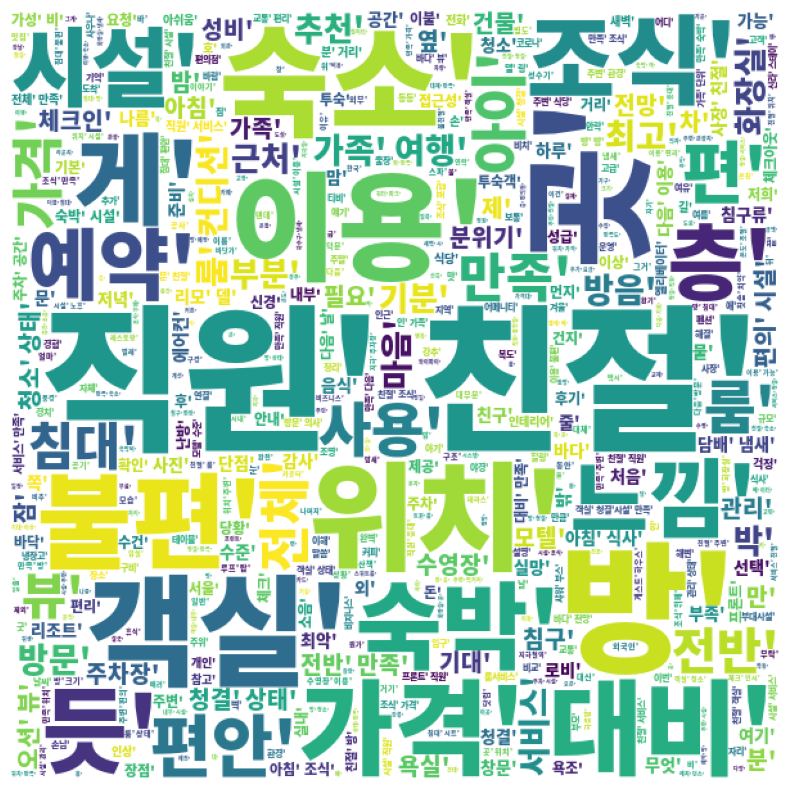

In [126]:
wc = WordCloud(
    width = 600,
    height = 600,
    max_words=15000,
    font_path=font,
    background_color='white',
    stopwords=['숙소','숙박','듯'] # 빼고싶은 단어 넣어주기
).generate(str(all_word))
plt.figure(figsize=(20,10))
plt.imshow(wc)
plt.axis('off')

좋은 리뷰 안 좋은 리뷰 나눠서 좋은 리뷰를 남긴 사람들이 가장 많이 사용한 단어를 찾고 안 좋은 리뷰를 적은 사람이 어떤 단어를 사용했는지 분석을 해보자.

### rating이 8이상인 사용자 리뷰 = good
### rating 7이하인 사용자 리뷰는 bad로 나누어 워드 클라우드 생성

In [130]:
good = data.loc[data['rating'] >=8, 'description2']
bad = data.loc[data['rating'] <=7, 'description2']

(-0.5, 599.5, 399.5, -0.5)

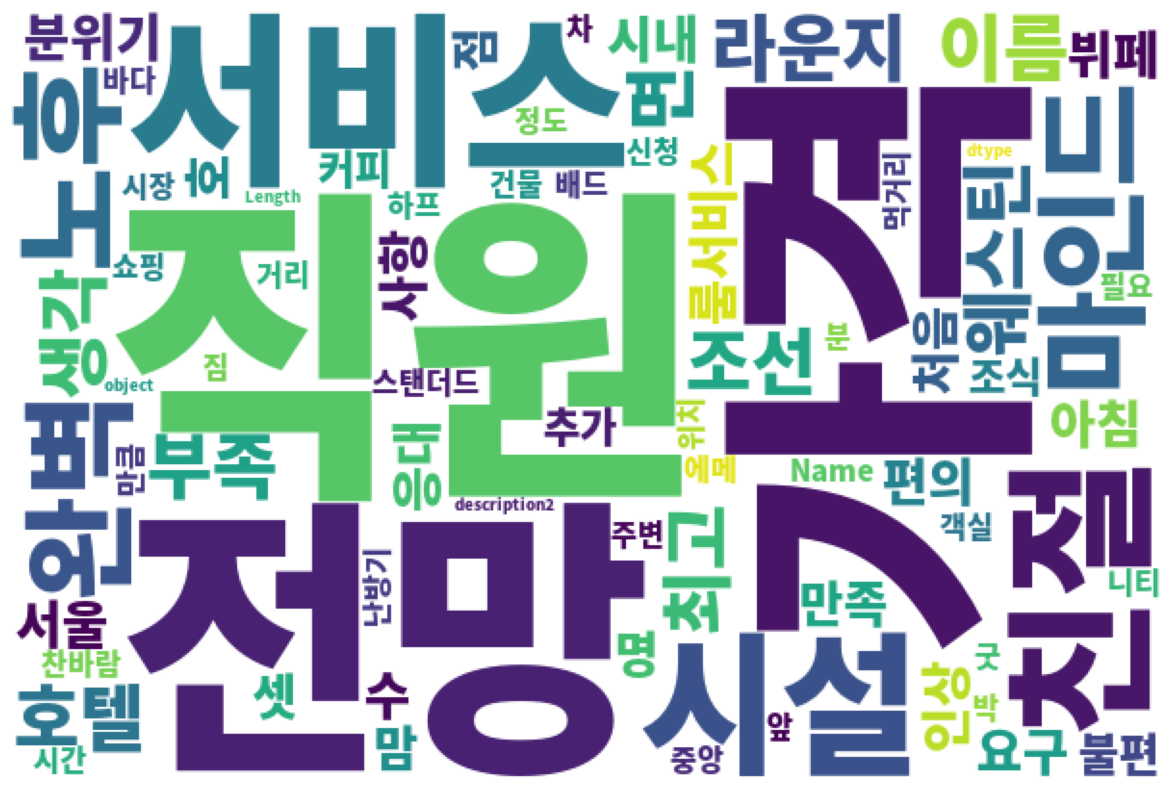

In [137]:
# good ratings
wc = WordCloud(
    width = 600,
    height = 400,
    max_words=15000,
    font_path=font,
    background_color='white',
    stopwords=['숙소','숙박','듯', '곳'] # 빼고싶은 단어 넣어주기
).generate(str(good))
plt.figure(figsize=(20,10))
plt.imshow(wc)
plt.axis('off')

(-0.5, 599.5, 399.5, -0.5)

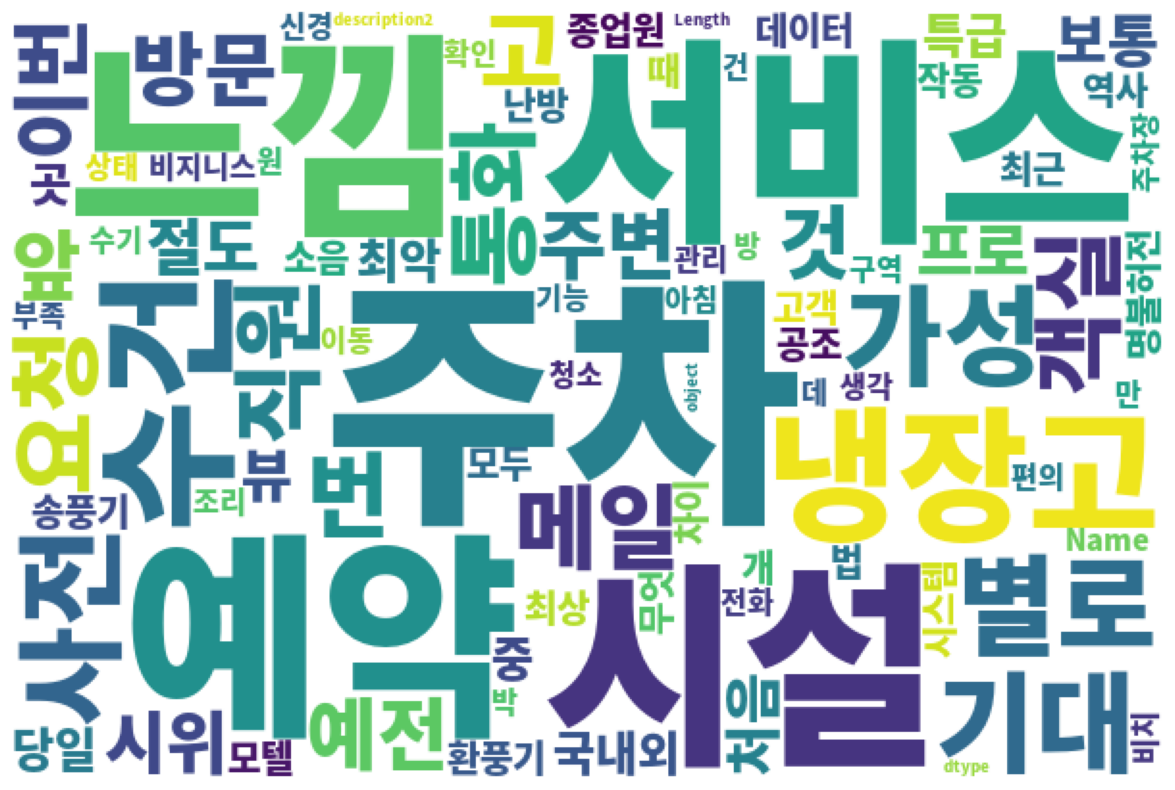

In [139]:
# bad ratings
wc = WordCloud(
    width = 600,
    height = 400,
    max_words=15000,
    font_path=font,
    background_color='white',
    stopwords=['숙소','숙박','듯','호텔','실망'] # 빼고싶은 단어 넣어주기
).generate(str(bad))
plt.figure(figsize=(20,10))
plt.imshow(wc)
plt.axis('off')

In [150]:
data.loc[data['description'].str.contains("주차"), ['tripType','description']][:20]

,tripType,description
61,other,음식도 맛있고 깨끗하고 좋아요명동에서 가깝고 가격도 좋고 친절하고 주차도 좋도 오...
80,family,주차장진입이 좀 어렵지만 역사가 있는 오랜호텔이라 그러련했습니다 객실컨디션과 직원응...
114,other,5성급이라 그런지 서비스가 훌륭합니다모든 직원분들이 친절하시고 객실상태도 최고입니다...
116,other,체크인때 주차부터 모든 직원분들이 친절하셨고 쾌적하게 잘 지내고 왔습니다
178,other,주차장이 살짝 거리가 있어서 발렛이 아니면 좀 걸어야하는 점 투숙객에 주차비를 받는...
186,other,위치와 전망 모두 아주 좋았으나 주차하는데 30분 걸렸어요 발렛도 다 차서 안된다고...
205,family,주차장에들어서면서 부터 너무힘들었어요 호텔주차하는데 너무오래걸려서 운전자만두고 먼저...
228,family,해외에서 이용 시 만족했던 그랜드하얏트라 우리나라도 한번 예약해봤던 곳이나 체크인...
259,other,주차비 만원 너무해 방은 엄청 좋았음
264,family,가을 하늘과 시내 야경이 오랫만의 서울 방문을 즐겁게 해 주었네요 객실 가구와 침구...


In [147]:
for i in data.loc[(data['description'].str.contains("주차")) & (data['is_good']==0), 'description'][:20]:
    print(i)
    print()

해외에서  이용 시 만족했던 그랜드하얏트라 우리나라도 한번 예약해봤던 곳이나 체크인 시 안내 받았던 룸과 클럽라운지에서 대기하며 안내받은 룸이 달라 문의하였지만 적극적으로 확인해주거나 응대하지 않아 불쾌했으며 라운지 이용시간 및 부대시설이용에 대한 설명이 부족했고 직원에서 라운지 이브닝타임을 문의했었는데 한명은 5시로 5시에 준비가 안되어 다른 직원에게 문의하니 6시로 안내받았습니다 그밖에도 여러가지로 불편했으며 투숙객임에도 유료주차라는 것은 개선이 되었으면 합니다 유료주차는 처음이라하니 아니라고 요즘호텔은 거의 유료라며 직원은 마치 호텔을 많이 이용 안하는 손님이라는 생각으로 말하는 뉘앙스로 응대하고 더구나 차량 등록을 했음에도 출차시 차단 바가 열리지 않는 등 5성급 호텔 수준은 아닌 듯 합니다 재방문의사는 당연히 없습니다 게스트 서비스나 룸서비스 요청 시 응대는 빨랐습니다

1 다른 호텔과 구별되는 룸의 특징이라면 침대 공간은 넓게 잡은 반면 화장실과 욕조 공간을 좁게 잡아서 이용이 다소 불편할 정도라는 점입니다 청결도는 좋았지만 룸에 거울이 너무 많이 붙어 있어서 다소 산만하고 어지러운 느낌을 줍니다 아마도 상대적으로 룸을 넓게 보이도록 효과를 주고자 한 것 같은데 처음 잠깐만 그런 인상을 주고 오래 있으면 산만합니다2 책상 하나도 없는 룸은 요즘 룸 추세와는 다소 다르네요3 주차비도 유료입니다 물론 투숙객 할인은 있지만 다소 이해가 되지 않습니다4 코로나때문이라고는 하는데 피트니스에서 운동복도 대여해 주지 않는다고 하더군요 그런 중요한 정책의 변화는 사전에 미리 공지가 되어야고객들에게 개별적으로 알려주지는 않더라도 적어도 호텔 홈페이지나 세부정책 부분에는 소개가 되어 있어야 한다고 생각합니다 마땅할텐데 아무런 사전 고지가 없어서 결국 호텔에 묵으면서 시설을 제대로 이용할 수 없었습니다 근래 계속 다른 호텔도 묵어 보았는데 코로나 때문에 운동복을 대여해주지 않는 호텔은 여기가 처음이었습니다5 원래 메뉴에 없음에도 고기를 먹지 않는 손님을 위해 신속하게 

In [149]:
for i in data.loc[(data['description'].str.contains("절도")) & (data['is_good']==0), 'description'][:20]:
    print(i)
    print()

서비스 친절도가 프로답지않은 느낌입니다

깨끗하고 조용하고 친절합니다 코로나 때문인지  체육관 대여 서비스에 부재가 있습니다 충전기 절도 때문인지 충전기 대여서비스에 부재가 있습니다 수영장 치킨은 신라호텔이 양과 맛에서 더 좋았습니다

솔직히 5성급이라 선택했는데 직원 친절도와 수영장 이외는 절대 안가고 싶은 호텔입니다

5성급 대비 위치나 뷰는 훌륭하지만 직원 친절도는 떨어집니다

조식 라운지바 음식이 별로네요 친절도나 청결도는 좋아요 음식 기대하고 오면 안될것같네요

처음 안내받은 방에는 침대 옆에 옆방과 연결된 이상한 출입문이 있었고 그 문이 이상하여 열어보았더니 그 안은 방음재로 막아놓았습니다 이 문을 통해 옆방의 전화통화 내용과 목소리가 디테일하게 모두 다 들렸습니다 이와 같은 방음문제 때문에 방 변경을 요청하였고 프론트에선 친절하게 응대해주시면서 신관의 새로운 방으로 옮겼습니다 문제는 이때부터인데 변경된 방은 전에 묵었던 사람의 속옷수용복 더러워서 들춰보지 않았습니다과 양말이 화장실 수납장에 있었고 침대 옆 카펫이 푹 젖어있었지만 방 바꿔준게 고맙기도하고 당연히 청소하다 흘린 물인줄 알아서 일단 참았습니다 하지만 밤에 오줌냄새 비슷한 비린내가 심해서 설마하고 젖어있던 카펫부분 냄새를 맡아보니 거기서 나더라구요 그래도 오줌은 아니겠지 맥주흘린거 비린내겠지 하면서 침대커버이불위의 색깔있는 천같은거 같은거로 덮고 2박동안 생활했습니다 여행말고 호캉스로 간 첫 호텔인데 실망이 너무 컸습니다그 외 조식 친절도 시설 등은 만족합니다만 청결도에 관해서는 제가 묵었던 호텔 중 가장 심각하여 이렇게 글을 남깁니다

호텔 방 청결도 불만  먼지 많음 냄새 많이 남 화장실 사용전에도 머리카락 등 청소 깨끗이 안되어 있었음예약 불만  호텔스닷컴 예약 미리 하고 갔으나 호텔 로비에서 예약 여부 확인 불가능했음 원래 예약대로 방을 준건지 예약 금액이 맞는건지 등등도 불확실해 보였음조식 불만  추가로 지불한 조식도 맛 없음 돈아까움친절도  로비에서의 직원 안내 등도 불친절함


In [151]:
data.head()

,hotelName,tripType,reviewDate,rating,description,is_good,is_good2,description2
0,서울 웨스틴조선호텔 (The Westin Chosun Seoul),family,2019년 1월 26일,10.0,직원들 서비스나 마인드 완벽합니다 다만 노후된 시설과 좁은 라운지가 호텔 이름에 비...,1,1,"[직원, 서비스, 마인드, 완벽, 노후, 시설, 라운지, 호텔, 이름, 부족]"
1,서울 웨스틴조선호텔 (The Westin Chosun Seoul),family,2019년 2월 4일,10.0,웨스틴조선은 모든면에서 최고의 숙소라고 생각합니다 분위기 편의성 직원친절도까지 모두...,1,1,"[웨스틴, 조선, 면, 최고, 숙소, 생각, 분위기, 편의, 직원, 친절, 인상]"
2,서울 웨스틴조선호텔 (The Westin Chosun Seoul),other,2019년 2월 2일,10.0,서울시내에서 호캉스를 누릴 수 있는 곳아침 뷔페가 맛있는 곳룸서비스가 좋았음요구사항...,1,1,"[서울, 시내, 호, 수, 곳, 아침, 뷔페, 곳, 룸서비스, 요구, 사항, 응대,..."
3,서울 웨스틴조선호텔 (The Westin Chosun Seoul),romance,2019년 1월 26일,10.0,가격에 맞게 만족했습니다,1,1,"[가격, 만족]"
4,서울 웨스틴조선호텔 (The Westin Chosun Seoul),with-friends,2019년 1월 25일,10.0,처음 세명으로 셋팅 되어있지 않은점 빼고는 직원들의 친절도 및 서비스는 모두 맘에 ...,1,1,"[처음, 명, 셋, 점, 직원, 친절, 서비스, 맘, 시설, 불편, 추가, 커피, ..."


## 나이브베이즈 알고리즘으로 텍스트 감성분석하기(긍정이냐 부정이냐 분석하는 게 감성분석)
* 리뷰글을 분석한 후 이게 긍정인지 부정인지 판별하는 모델을 만들자.

In [8]:
X = data['description']
y = data['is_good']

NameError: name 'data' is not defined

In [153]:
X

0        직원들 서비스나 마인드 완벽합니다 다만 노후된 시설과 좁은 라운지가 호텔 이름에 비...
1        웨스틴조선은 모든면에서 최고의 숙소라고 생각합니다 분위기 편의성 직원친절도까지 모두...
2        서울시내에서 호캉스를 누릴 수 있는 곳아침 뷔페가 맛있는 곳룸서비스가 좋았음요구사항...
3                                            가격에 맞게 만족했습니다
4        처음 세명으로 셋팅 되어있지 않은점 빼고는 직원들의 친절도 및 서비스는 모두 맘에 ...
                               ...                        
74995    조식과 스탠더드 하프전망 신청해서  1박 했는데요ᆢ너무 좋아요ᆢ다만 가격이 좀 나가...
74996    객실은 깔끔하고 에메니티도 딱 필요한만큼 있었습니다 5분거리에 중앙시장이 있어 쇼핑...
74997    배드가 좋고 조용해서 좋았습니다찬바람이 좀 들어와서 난방기를 12시간 정도 돌려야 ...
74998    우선 위치가 너무 좋았고 숙소에 짐을 놓고 걸어서 주변 가볼곳도 있고 먹거리도 맛있...
74999    주차장이 부족해서 다른데에 주차했는데 아침에 이동해달라는 전화가 와서 다소 불쾌했슴...
Name: description, Length: 75000, dtype: object

In [154]:
y

0        1
1        1
2        1
3        1
4        1
        ..
74995    1
74996    1
74997    1
74998    1
74999    0
Name: is_good, Length: 75000, dtype: int64

문자를 숫자로 바꾸는 거는 벡터를 이용한다! 문자를 숫자로 바꾸자!

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

In [7]:
cv = CountVectorizer(lowercase=False)
cv.fit(X)
X = cv.transform(X)

NameError: name 'X' is not defined

In [159]:
X

<75000x261324 sparse matrix of type '<class 'numpy.int64'>'
	with 1300173 stored elements in Compressed Sparse Row format>

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

NameError: name 'X' is not defined

In [162]:
y.value_counts() #클래스가 불균형. 긍정리뷰가 3배는 더 많다.

is_good
1    58386
0    16614
Name: count, dtype: int64

# 나이브 베이즈 알고리즘으로 분석하기

In [163]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train, y_train)
pred = model.predict(X_test)


/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [165]:
from sklearn.metrics import accuracy_score, classification_report

In [168]:
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

0.8551555555555556
              precision    recall  f1-score   support

           0       0.74      0.55      0.63      5066
           1       0.88      0.94      0.91     17434

    accuracy                           0.86     22500
   macro avg       0.81      0.75      0.77     22500
weighted avg       0.85      0.86      0.85     22500



/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

# 랜덤포레스트로 분석

In [172]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=5, n_estimators= 100, n_jobs=-1, random_state=10)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)
print(accuracy_score(y_test, pred_rfc))
print(classification_report(y_test, pred_rfc))

/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


0.7748444444444444
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5066
           1       0.77      1.00      0.87     17434

    accuracy                           0.77     22500
   macro avg       0.39      0.50      0.44     22500
weighted avg       0.60      0.77      0.68     22500



/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

* 0에 대한 건 precision, recall, f1-score 모두 맞추지 못했기 때문에 이 알고리즘은 예측을 하기에 부적적하다 판단.

# 하이퍼파라미터 튜닝 랜덤서치

## 그리드서치(Grid Search)
* manual Search에 비해, Grid Search는 체계적인 방식으로 하이퍼파라미터 최적화를 수행.
* **Grid Search는 모든 parameter의 경우의 수에 대해 Cross-validation 결과가 가장 좋은 parameter를 고르는 방법**
* 전체 탐색 대상 구간, 간격은 분석가의 지정이 필요하나, 균등하고 전역적인 탐색이 가능하다는 장점이 있음.
* 단, 하이퍼파라미터의 개수가 많아질수록 전체 탐색 시간이 기하급수적으로 증가한다는 아주 치명적인 단점이 있음.

## 랜덤서치
* Grid Search가 전수조사라면 RandomSearch는 표본조사
* 하이퍼파라미터 값을 랜덤 샘플링 해 선정
* RandomSearch는 GridSearch에 비해 불필요한 반복 수행 회수를 대폭 줄이면서, 동시에 정해진 간격 사이에 위치한 값들에 대해서도 확률적으로 탐색이 가능하므로, 최적 하이퍼파라미터를 더 빨리 찾을 수 있다.

In [198]:
from sklearn.model_selection import RandomizedSearchCV

In [206]:
import warnings
warnings.filterwarnings('ignore')

In [202]:
 # params에 범위를 줘야 해.
params = dict(max_depth=[3,5,7,10], n_estimators=[100, 300, 500], criterion=['gini', 'entropy', 'log_loss'])
params

{'max_depth': [3, 5, 7, 10],
 'n_estimators': [100, 300, 500],
 'criterion': ['gini', 'entropy', 'log_loss']}

[CV 3/5] END criterion=gini, max_depth=3, n_estimators=100;, score=0.780 total time=   3.5s
[CV 3/5] END criterion=gini, max_depth=3, n_estimators=300;, score=0.780 total time=   8.7s
[CV 2/5] END criterion=gini, max_depth=3, n_estimators=500;, score=0.780 total time=  14.5s
[CV 5/5] END criterion=gini, max_depth=3, n_estimators=500;, score=0.780 total time=  14.2s
[CV 4/5] END criterion=gini, max_depth=5, n_estimators=300;, score=0.780 total time=  13.2s
[CV 3/5] END criterion=gini, max_depth=5, n_estimators=500;, score=0.780 total time=  21.5s
[CV 2/5] END criterion=gini, max_depth=7, n_estimators=100;, score=0.780 total time=   6.0s
[CV 4/5] END criterion=gini, max_depth=7, n_estimators=100;, score=0.780 total time=   6.0s
[CV 2/5] END criterion=gini, max_depth=7, n_estimators=300;, score=0.780 total time=  17.4s
[CV 1/5] END criterion=gini, max_depth=7, n_estimators=500;, score=0.780 total time=  29.2s
[CV 5/5] END criterion=gini, max_depth=7, n_estimators=500;, score=0.780 total t

[CV 1/5] END criterion=gini, max_depth=3, n_estimators=100;, score=0.780 total time=   3.4s
[CV 2/5] END criterion=gini, max_depth=3, n_estimators=300;, score=0.780 total time=   8.5s
[CV 5/5] END criterion=gini, max_depth=3, n_estimators=300;, score=0.780 total time=   9.1s
[CV 4/5] END criterion=gini, max_depth=3, n_estimators=500;, score=0.780 total time=  14.2s
[CV 5/5] END criterion=gini, max_depth=5, n_estimators=100;, score=0.780 total time=   4.5s
[CV 3/5] END criterion=gini, max_depth=5, n_estimators=300;, score=0.780 total time=  12.9s
[CV 2/5] END criterion=gini, max_depth=5, n_estimators=500;, score=0.780 total time=  21.4s
[CV 1/5] END criterion=gini, max_depth=7, n_estimators=100;, score=0.780 total time=   6.1s
[CV 3/5] END criterion=gini, max_depth=7, n_estimators=100;, score=0.780 total time=   6.3s
[CV 1/5] END criterion=gini, max_depth=7, n_estimators=300;, score=0.780 total time=  17.3s
[CV 5/5] END criterion=gini, max_depth=7, n_estimators=300;, score=0.780 total t

In [201]:
rand_cv = RandomizedSearchCV(rfc, param_distributions=params, cv=5, n_jobs=-1,random_state=10)
rand_cv.fit(X_train, y_train)
rd_cv_pred = rand_cv.predict(X_test)
print(sorted(rand_cv.cv_results_.keys()))
print(f'최적 하이퍼 파라미터: ', rand_cv.best_params_)
print(f'최고 예측 정확도: {rand_cv.best_score_ : .4f}',)

/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

['mean_fit_time', 'mean_score_time', 'mean_test_score', 'param_criterion', 'param_max_depth', 'param_n_estimators', 'params', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'std_fit_time', 'std_score_time', 'std_test_score']
최적 하이퍼 파라미터:  {'n_estimators': 100, 'max_depth': 3, 'criterion': 'log_loss'}
최고 예측 정확도:  0.7800


In [204]:
# 하이퍼 파라미터 튜닝 후 최적 하이퍼 파라미터로 다시 돌려보자!
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=3, n_estimators= 100, criterion='log_loss', n_jobs=-1, random_state=10)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)
print(accuracy_score(y_test, pred_rfc))
print(classification_report(y_test, pred_rfc))

/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


0.7748444444444444
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5066
           1       0.77      1.00      0.87     17434

    accuracy                           0.77     22500
   macro avg       0.39      0.50      0.44     22500
weighted avg       0.60      0.77      0.68     22500



/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

# 데이터 증폭/축소 후 하이퍼파라미터 튜닝하고 최종 모델 만들기

### imbalanced-learn 
* imbalanced-learn 홈페이지에 들어가면 축소, 증폭하는 알고리즘을 알 수 있음 예) smote 데이터 증폭을 할 때 사용

* 데이터 증폭 후 분석

In [208]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SVMSMOTE
sm = SVMSMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)


In [209]:
y_res.value_counts()

is_good
1    40952
0    40952
Name: count, dtype: int64

In [210]:
rand_cv = RandomizedSearchCV(rfc, param_distributions=params, cv=5, n_jobs=-1,random_state=10)
rand_cv.fit(X_res, y_res)
rd_cv_pred = rand_cv.predict(X_test)
print(sorted(rand_cv.cv_results_.keys()))
print(f'최적 하이퍼 파라미터: ', rand_cv.best_params_)
print(f'최고 예측 정확도: {rand_cv.best_score_ : .4f}',)

/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

['mean_fit_time', 'mean_score_time', 'mean_test_score', 'param_criterion', 'param_max_depth', 'param_n_estimators', 'params', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'std_fit_time', 'std_score_time', 'std_test_score']
최적 하이퍼 파라미터:  {'n_estimators': 500, 'max_depth': 7, 'criterion': 'log_loss'}
최고 예측 정확도:  0.7423


In [212]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=7, n_estimators= 1000, criterion='log_loss', n_jobs=-1, random_state=10)
rfc.fit(X_res, y_res)
pred_rfc = rfc.predict(X_test)
print(accuracy_score(y_test, pred_rfc))
print(classification_report(y_test, pred_rfc))

0.8060888888888889
              precision    recall  f1-score   support

           0       0.55      0.76      0.64      5066
           1       0.92      0.82      0.87     17434

    accuracy                           0.81     22500
   macro avg       0.74      0.79      0.75     22500
weighted avg       0.84      0.81      0.82     22500



* 데이터 축소 후 분석

In [214]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import AllKNN
allknn = AllKNN()
X_res2, y_res2 = allknn.fit_resample(X_train, y_train)

In [215]:
rand_cv = RandomizedSearchCV(rfc, param_distributions=params, cv=5, n_jobs=-1,random_state=10)
rand_cv.fit(X_res2, y_res2)
rd_cv_pred = rand_cv.predict(X_test)
print(f'최적 하이퍼 파라미터: ', rand_cv.best_params_)
print(f'최고 예측 정확도: {rand_cv.best_score_ : .4f}',)

/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/wingsoul/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

최적 하이퍼 파라미터:  {'n_estimators': 100, 'max_depth': 7, 'criterion': 'entropy'}
최고 예측 정확도:  0.5804


In [3]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=7, n_estimators= 100, criterion='entropy', n_jobs=-1, random_state=10)
rfc.fit(X_res2, y_res2)
pred_rfc = rfc.predict(X_test)
print(accuracy_score(y_test, pred_rfc))
print(classification_report(y_test, pred_rfc))

NameError: name 'X_res2' is not defined

In [218]:
y_res2.value_counts()

is_good
1    15885
0    11548
Name: count, dtype: int64

### OneSidedSelection 으로 데이터 축소

In [9]:
from imblearn.under_sampling import OneSidedSelection
oss = OneSidedSelection(random_state=42)
X_res3, y_res3 = oss.fit_resample(X_train, y_train)

NameError: name 'X_train' is not defined

In [ ]:
rand_cv = RandomizedSearchCV(rfc, param_distributions=params, cv=5, n_jobs=-1,random_state=10)
rand_cv.fit(X_res3, y_res3)
rd_cv_pred = rand_cv.predict(X_test)
print(f'최적 하이퍼 파라미터: ', rand_cv.best_params_)
print(f'최고 예측 정확도: {rand_cv.best_score_ : .4f}',)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=7, n_estimators= 1000, criterion='log_loss', n_jobs=-1, random_state=10)
rfc.fit(X_res3, y_res3)
pred_rfc = rfc.predict(X_test)
print(accuracy_score(y_test, pred_rfc))
print(classification_report(y_test, pred_rfc))

# TfidfVectorizer로 분석

In [242]:
X2 = data['description']
y2 = data['is_good']

In [243]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [244]:
from konlpy.tag import Mecab
mecab = Mecab()
def tw_tokenizer(text):
    tokens_ko = mecab.morphs(text)
    return tokens_ko

In [247]:
tfidfv = TfidfVectorizer(tokenizer=tw_tokenizer, ngram_range=(1,2), min_df=3, max_df=0.9, lowercase=False)

In [248]:
X2 = tfidfv.fit_transform(X2)

In [249]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=10)

In [250]:
model_tfidv = MultinomialNB()
model_tfidv.fit(X_train2, y_train2)
pred2 = model_tfidv.predict(X_test2)
print(accuracy_score(y_test2, pred2))
print(classification_report(y_test2, pred2))

0.8370666666666666
              precision    recall  f1-score   support

           0       0.89      0.31      0.46      5066
           1       0.83      0.99      0.90     17434

    accuracy                           0.84     22500
   macro avg       0.86      0.65      0.68     22500
weighted avg       0.85      0.84      0.81     22500



* 정확도는 낮지만 precision이 들어오면 새로운 데이터가 들어왔을 때 예측도나 적응력이 좋은 모델임. 목적이 고객만족도를 예측하는 거라면 precision이 높은 게 좋아.

* 여기부터는 내가 실험삼아 한거

In [27]:
data['rating'].value_counts()

rating
10.0    34103
8.0     24283
6.0      8877
4.0      4278
2.0      3459
Name: count, dtype: int64

In [33]:
34103 / 75000 * 100

45.470666666666666

In [34]:
len(data['rating'] == 10.0) / len(data['rating']) *100

100.0

In [41]:
len(data[data['rating'] == 10.0]) / len(data['rating']) * 100

45.470666666666666

In [42]:
data.loc[data['rating'] == 10.0]

,Unnamed: 0.1,Unnamed: 0,hotelId,hotelName,tripType,tripTypeText,reviewDate,rating,description,isKorNot
0,0,356,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),family,1박 가족 여행,2019년 1월 26일,10.0,직원들 서비스나 마인드 완벽합니다 다만 노후된 시설과 좁은 라운지가 호텔 이름에 비...,True
1,1,357,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),family,1박 가족 여행,2019년 2월 4일,10.0,웨스틴조선은 모든면에서 최고의 숙소라고 생각합니다 분위기 편의성 직원친절도까지 모두...,True
2,2,358,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),other,2박 여행,2019년 2월 2일,10.0,서울시내에서 호캉스를 누릴 수 있는 곳아침 뷔페가 맛있는 곳룸서비스가 좋았음요구사항...,True
3,3,359,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),romance,1박 로맨틱 여행,2019년 1월 26일,10.0,가격에 맞게 만족했습니다,True
4,4,360,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),with-friends,친구와 1박 여행,2019년 1월 25일,10.0,처음 세명으로 셋팅 되어있지 않은점 빼고는 직원들의 친절도 및 서비스는 모두 맘에 ...,True
...,...,...,...,...,...,...,...,...,...,...
74985,74985,223904,798937728,씨 크루즈 호텔 (Sea Cruise Hotel),romance,1박 로맨틱 여행,2019년 8월 31일,10.0,시설도 꺠끗하고 좋은 호텔입니다,True
74987,74987,223906,798937728,씨 크루즈 호텔 (Sea Cruise Hotel),romance,1박 로맨틱 여행,2019년 8월 24일,10.0,방음 잘 되고 이불이랑 베개가 너무 편했어요 조식은 비싸서 이용 안 했는데 숙소 아...,True
74991,74991,223910,798937728,씨 크루즈 호텔 (Sea Cruise Hotel),family,1박 가족 여행,2019년 8월 17일,10.0,깨끗하고 직원분들 친절해서 좋았어요 한가지 아쉬운 점은 엘리베이터 이용이 너무 불편...,True
74994,74994,223913,798937728,씨 크루즈 호텔 (Sea Cruise Hotel),other,1박 여행,2019년 6월 29일,10.0,혼자 갔는데 깨끗하고 다 좋았습니다,True


In [50]:
data.loc[data['rating']==10.0, 'rating']

0        10.0
1        10.0
2        10.0
3        10.0
4        10.0
         ... 
74985    10.0
74987    10.0
74991    10.0
74994    10.0
74995    10.0
Name: rating, Length: 34103, dtype: float64

In [49]:
data.loc[data['rating']==10.0, ['rating', 'reviewDate']]

,rating,reviewDate
0,10.0,2019년 1월 26일
1,10.0,2019년 2월 4일
2,10.0,2019년 2월 2일
3,10.0,2019년 1월 26일
4,10.0,2019년 1월 25일
...,...,...
74985,10.0,2019년 8월 31일
74987,10.0,2019년 8월 24일
74991,10.0,2019년 8월 17일
74994,10.0,2019년 6월 29일
